Code snippets from Anna Petrasova - futures_triangle.ipynb and FUTURES_v3 case study.ipynb

Start GRASS Session

In [1]:
import os
from IPython.display import Image
from helper import show_interactively, show
import grass.script as gs
# had to add shell = True to helper.py for this to work
from helper import initialize_GRASS_notebook
initialize_GRASS_notebook(binary='grass83',
                          grassdata="D:\\grassdata", location="FUTURES_zoning_prelim",
                          mapset="input")

In [10]:
train_years = [2001, 2004, 2006, 2008, 2011]
validate_years = [2013, 2016, 2019, 2021]
# scenarios
# core district zones
core_district = 'dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km'
# sub-district zones
sub_district = 'dist_to_downtown_km,dist_to_planned_dev_km,dist_to_commercial_km,dist_to_industrial_km,dist_to_low_den_residential_km,dist_to_high_den_residential_km'

# without zoning
parameters = 'devpressure_30_05_01_2001,slope,road_dens_perc,forest_2001_smooth_perc,dist_to_water_km,dist_to_protected_km,dist_to_city_boundaries_km'
# with zoning - core
core_parameters = ",".join([parameters, core_district])
# with zoning - sub
sub_parameters = ",".join([parameters, sub_district])


In [5]:
!g.gui

In [16]:
os.getcwd()

'c:\\Users\\malawrim\\Documents\\GitHub\\FUTURES_zoning_prelim'

In [ ]:
!g.extension r.sample.category
# r.object.geometry is r.neighborhoodmatrix
!g.extension r.neighborhoodmatrix

In [2]:
!v.import input=D:\Zoning_Development\input_data\NCDOT_County_Boundaries.shp output=counties
# set region to NC counties and resolution to 30m 
!g.region -a vector=counties@input res=30

Importing <D:\Zoning_Development\input_data\NCDOT_County_Boundaries.shp>
...
Check if OGR layer <NCDOT_County_Boundaries> contains polygons...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Creating attribute table for layer <NCDOT_County_Boundaries>...
Default driver / database set to:
driver: sqlite
database: $GISDBASE/$LOCATION_NAME/$MAPSET/sqlite/sqlite.db
Importing 100 features (OGR layer <NCDOT_County_Boundaries>)...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
-----------------------------------------------------
Registering primitives...

-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Bre

In [3]:
# import data
# roads
!v.import output=roads extent=region input=D:\Zoning_Development\input_data\tl_2021_37_prisecroads.shp layer=tl_2021_37_prisecroads
# rails
!v.import output=rails extent=region input=D:\Zoning_Development\input_data\tl_2021_us_rails.shp layer=tl_2021_us_rails
# protected areas
!v.import output=protected extent=region input=D:\Zoning_Development\input_data\PADUS3_0Combined_StateNC.shp layer=PADUS3_0Combined_StateNC
# slope
!r.import extent=region resolution=region input=D:\Zoning\DEM\slope.tif output=slope

ERROR: Unable to open datasource
       <D:\Zoning_Development\input_data\nlcd_2001_land_cover_l48_20230630.img>
ERROR: Unable to open datasource
       <D:\Zoning_Development\input_data\nlcd_2001_land_cover_l48_20230630.img>
ERROR: Unable to read GDAL dataset
       <D:\Zoning_Development\input_data\nlcd_2001_land_cover_l48_20230630.img>
Importing <D:\Zoning_Development\input_data\tl_2021_37_prisecroads.shp> ...
Check if OGR layer <tl_2021_37_prisecroads> contains polygons...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Creating attribute table for layer <tl_2021_37_prisecroads>...
Default driver / database set to:
driver: sqlite
database: $GISDBASE/$LOCATION_NAME/$MAPSET/sqlite/sqlite.db
Importing 8020 features (OGR layer <tl_2021_37_prisecroads>)...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36 

In [14]:
# city boundaries
!v.import output=city_boundaries extent=region input=D:\Zoning_Development\input_data\NCDOT_City_Boundaries.shp layer=NCDOT_City_Boundaries

# intersections
!v.import output=interchanges extent=region input=D:\Zoning\interchanges\NC_interchange.shp layer=NC_interchange

Importing <D:\Zoning_Development\input_data\NCDOT_City_Boundaries.shp> ...
Check if OGR layer <NCDOT_City_Boundaries> contains polygons...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Creating attribute table for layer <NCDOT_City_Boundaries>...
Default driver / database set to:
driver: sqlite
database: $GISDBASE/$LOCATION_NAME/$MAPSET/sqlite/sqlite.db
Importing 550 features (OGR layer <NCDOT_City_Boundaries>)...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
-----------------------------------------------------
Registering primitives...
     100
-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Bre

In [2]:
# import all years of NLCD
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2021_land_cover_l48_20230630.img output=nlcd_2021
!r.import extent=region resolution=region input=D:\Zoning\nlcd2019\nlcd.tif output=nlcd_2019
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2016_land_cover_l48_20210604.img output=nlcd_2016
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2013_land_cover_l48_20210604.img output=nlcd_2013
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2011_land_cover_l48_20210604.img output=nlcd_2011
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2008_land_cover_l48_20210604.img output=nlcd_2008
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2006_land_cover_l48_20210604.img output=nlcd_2006
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2004_land_cover_l48_20210604.img output=nlcd_2004
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2001_land_cover_l48_20210604.img output=nlcd_2001

Building topology for vector map
<tmp_r_import_region_GIS_LAB_57_3252@input>...
Registering primitives...

Building areas...
   0 100
Attaching islands...
   0 100
Attaching centroids...
   0 100
Found 2 possible transformations
************************
Operation 1:
Description: Inverse of SPCS83 North Carolina zone (meters) + NAD83 to WGS
84 (55) + Albers Equal Area

Area of use: United States (USA) - North Carolina - counties of Alamance;
Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen;
Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell;
Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven;
Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe;
Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford;
Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell;
Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin;
McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash

In [6]:
# import zoning data
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\zoning_core_reclass.tif output=zoning_core
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\zoning_sub_reclass.tif output=zoning_sub

Building topology for vector map
<tmp_r_import_region_GIS_LAB_57_11804@input>...
Registering primitives...

Building areas...
   0 100
Attaching islands...
   0 100
Attaching centroids...
   0 100
Found 2 possible transformations
************************
Operation 1:
Description: Inverse of SPCS83 North Carolina zone (meters) + NAD83 to WGS
84 (55) + Albers Equal Area

Area of use: United States (USA) - North Carolina - counties of Alamance;
Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen;
Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell;
Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven;
Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe;
Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford;
Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell;
Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin;
McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nas

In [31]:
# limiting extent to Central Pines Regional Council
!r.mask vector=central_pines_regional_council@input
# mask doesn't effect vectors so need to clip any vector data

Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54

In [4]:
!v.to.rast input=protected output=protected use=val
!r.null map=protected null=0
show('protected')

Pass 1 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 2 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 3 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 10

NameError: name 'show' is not defined

In [9]:
gs.mapcalc("urban_2001 = if(nlcd_2001 >= 21 && nlcd_2001 <= 24, 1, if(nlcd_2001 == 11 || nlcd_2001 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2004 = if(nlcd_2004 >= 21 && nlcd_2004 <= 24, 1, if(nlcd_2004 == 11 || nlcd_2004 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2006 = if(nlcd_2006 >= 21 && nlcd_2006 <= 24, 1, if(nlcd_2006 == 11 || nlcd_2006 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2008 = if(nlcd_2008 >= 21 && nlcd_2008 <= 24, 1, if(nlcd_2008 == 11 || nlcd_2008 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2011 = if(nlcd_2011 >= 21 && nlcd_2011 <= 24, 1, if(nlcd_2011 == 11 || nlcd_2011 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2013 = if(nlcd_2013 >= 21 && nlcd_2013 <= 24, 1, if(nlcd_2013 == 11 || nlcd_2013 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2016 = if(nlcd_2016 >= 20 && nlcd_2016 <= 24, 1, if(nlcd_2016 == 11 || nlcd_2016 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2019 = if(nlcd_2019 >= 20 && nlcd_2019 <= 24, 1, if(nlcd_2019 == 11 || nlcd_2019 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2021 = if(nlcd_2021 >= 20 && nlcd_2021 <= 24, 1, if(nlcd_2021 == 11 || nlcd_2021 >= 90 || protected, null(), 0))")

In [ ]:
#37 for neighborhood size corresponds to 1km circle

In [11]:
!v.to.rast input=central_pines_regional_council type=area use=attr attribute_column=FIPS output=sa_counties
gs.mapcalc("water = if(nlcd_2021 == 11, 1, null())")
!r.grow.distance input=water distance=dist_to_water
!r.colors map=dist_to_water color=blues -en
show('dist_to_water')
!r.null map=protected setnull=0
!r.grow.distance input=protected distance=dist_to_protected
!r.colors map=dist_to_protected color=gyr -e
show('dist_to_protected')
gs.mapcalc("forest = if(nlcd_2021 >= 41 && nlcd_2021 <= 43, 1, 0)")
gs.mapcalc("forest_2001 = if(nlcd_2001 >= 40 && nlcd_2001 <= 43, 1, 0)")
!r.neighbors input=forest output=forest_smooth size=37 method=average -c
!r.neighbors input=forest_2001 output=forest_2001_smooth size=37 method=average -c
!r.colors map=forest_smooth,forest_2001_smooth color=ndvi
show('forest_smooth')

Pass 1 of 5:
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 2 of 5:
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 3 of 5:
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 4 of 5:
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 5 of 5:
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   

CalledModuleError: Module run `d.rast map=dist_to_interchanges` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

In [16]:
!v.to.rast input=city_boundaries type=area use=val output=city_boundaries
!r.grow.distance input=city_boundaries distance=dist_to_city_boundaries
!v.to.rast input=interchanges type=point use=val output=interchanges
!r.grow.distance input=interchanges distance=dist_to_interchanges
show('dist_to_interchanges')

Pass 1 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 2 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Pass 3 of 5:
Reading areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 10

CalledModuleError: Module run `d.rast map=road_dens` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


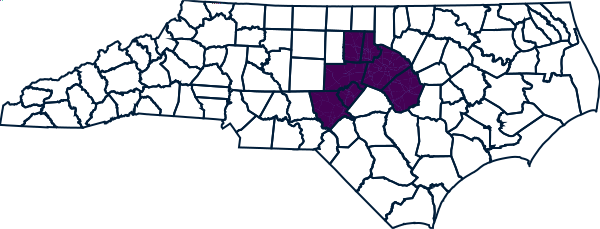

In [2]:
!v.to.rast input=roads type=line use=val output=roads
!r.null map=roads null=0
!r.neighbors input=roads output=road_dens size=37 method=average -c --overwrite
show('road_dens')

Dev Pressure

Window size   
the larger the window the more smooth the results and less effected it will be by small variations in the data  
but too large and you could miss some important details  
seems like I should do a small sensitivity analysis to see how window size influences the results  

In [3]:
#TODO decide about size of moving window - default is set to 8 -- maybe there is a reason for this?
# The larger the window the more efficient the runs

For the method you can choose between gravity, kernel, or occurence  
gravity = scaling_factor / pow(distance, gamma)  
kernel = scaling_factor * exp(-2 * distance / gamma)  
occurence = county of developed cells in window
gamma determines influence of distance - when gamma increases, development influence decreases more rapidly with distance

In [ ]:
#TODO determining best function and best value for gamma

In [ ]:
#TODO scaling factor?

Preparing data...
Running development pressure filter...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map <tmp_futures_devPressure_8752_out>
Removing raster <tmp_futures_devPressure_8752_copy>
Removing raster <tmp_futures_devPressure_8752_nulls>
Removing raster <tmp_futures_devPressure_8752_out>
Preparing data...
Running development pressure filter...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map <tmp_futures_devPressure_3816_out>
Removing raster <tmp_futures_devPressure_3816_copy>
Removing raster <tmp_futures_devPressure_3816_nulls>
Removing raster <tmp_futures_devPressure_3816_out>


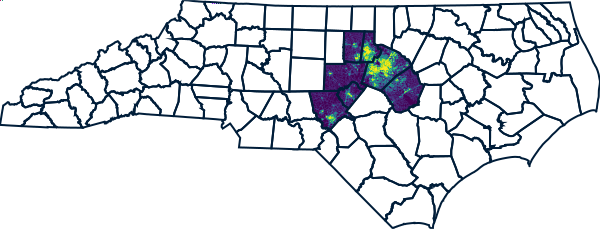

In [6]:
gs.mapcalc('urban_2001_nonull = if(isnull(urban_2001), 0, urban_2001)')
gs.mapcalc('urban_2021_nonull = if(isnull(urban_2021), 0, urban_2021)')
#TODO check these values
!r.futures.devpressure -n input=urban_2001_nonull output=devpressure_30_05_01_2001 method=gravity size=30 gamma=0.5 scaling_factor=0.1
!r.futures.devpressure -n input=urban_2021_nonull output=devpressure_30_05_01_2021 method=gravity size=30 gamma=0.5 scaling_factor=0.1
show('devpressure_30_05_01_2021')

Setting up zoning for POTENTIAL

In [8]:
# Will first just try distance to each core zoning districts
# distance to residential
gs.mapcalc("residential = if(zoning_core == 1, 1, null())")
!r.grow.distance input=residential distance=dist_to_residential
# distance to non-res
gs.mapcalc("nonresidential = if(zoning_core == 2, 1, null())")
!r.grow.distance input=nonresidential distance=dist_to_nonresidential
# distance to mixed-use
gs.mapcalc("mixeduse = if(zoning_core == 3, 1, null())")
!r.grow.distance input=mixeduse distance=dist_to_mixeduse


# Then try distance to specific sub-district zones
# distance to medium-low, medium, or high-density residential
gs.mapcalc("high_den_residential = if(zoning_sub <= 120, 1, null())")
!r.grow.distance input=high_den_residential distance=dist_to_high_den_residential
# distance to low-density and agricultural residential
gs.mapcalc("low_den_residential = if(zoning_sub > 120 && zoning_sub < 200, 1, null())")
!r.grow.distance input=low_den_residential distance=dist_to_low_den_residential
# distance to industrial
gs.mapcalc("industrial = if(zoning_sub == 201, 1, null())")
!r.grow.distance input=industrial distance=dist_to_industrial
# distance to commercial
gs.mapcalc("commercial = if(zoning_sub == 200, 1, null())")
!r.grow.distance input=commercial distance=dist_to_commercial
# distance to planned development
gs.mapcalc("planned_dev = if(zoning_sub == 301, 1, null())")
!r.grow.distance input=planned_dev distance=dist_to_planned_dev
# distance to downtown
gs.mapcalc("downtown = if(zoning_sub == 302, 1, null())")
!r.grow.distance input=downtown distance=dist_to_downtown

Reading raster map <nonresidential>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading raster map <mixeduse>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading raster map <high_den_residential>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63

Check about rescaling

In [9]:
for name in ['slope', 'dist_to_water', 'dist_to_protected',
             'forest_smooth', 'forest_2001_smooth', 'dist_to_city_boundaries', 'dist_to_interchanges',
             'road_dens', 'devpressure_30_05_01_2001', 'devpressure_30_05_01_2021',
             'dist_to_downtown', 'dist_to_planned_dev', 'dist_to_commercial', 'dist_to_industrial', 
             'dist_to_low_den_residential', 'dist_to_high_den_residential', 'dist_to_mixeduse',
             'dist_to_nonresidential', 'dist_to_residential']:
    minmax = gs.raster_info(name)
    print (name, minmax['min'], minmax['max'])

slope 0.0 55.83785
dist_to_water 0.0 449849.840946954
dist_to_protected 0.0 449931.227744863
forest_smooth 0.0 1.0
forest_2001_smooth 0.0 1.0
dist_to_city_boundaries 0.0 451068.702971066
dist_to_interchanges 0.0 456713.285223892
road_dens 0.0 1.0
devpressure_30_05_01_2001 0.0 68.51881
devpressure_30_05_01_2021 0.0 68.51881
dist_to_downtown 0.0 489448.689854207
dist_to_planned_dev 0.0 500901.781689784
dist_to_commercial 0.0 460028.061426692
dist_to_industrial 0.0 463507.682460604
dist_to_low_den_residential 0.0 452193.702963675
dist_to_high_den_residential 0.0 449839.248287652
dist_to_mixeduse 0.0 467212.824524327
dist_to_nonresidential 0.0 459879.825389199
dist_to_residential 0.0 449839.248287652


In [9]:
gs.mapcalc("dist_to_water_km = dist_to_water / 1000")
gs.mapcalc("dist_to_protected_km = dist_to_protected / 1000")
gs.mapcalc("dist_to_city_boundaries_km = dist_to_city_boundaries / 1000")
gs.mapcalc("dist_to_interchanges_km = dist_to_interchanges / 1000")
gs.mapcalc("road_dens_perc = road_dens * 100")
gs.mapcalc("forest_smooth_perc = forest_smooth * 100")
gs.mapcalc("forest_2001_smooth_perc = forest_smooth * 100")
gs.mapcalc("dist_to_downtown_km = dist_to_downtown / 1000")
gs.mapcalc("dist_to_planned_dev_km = dist_to_planned_dev / 1000")
gs.mapcalc("dist_to_commercial_km = dist_to_commercial / 1000")
gs.mapcalc("dist_to_industrial_km = dist_to_industrial / 1000")
gs.mapcalc("dist_to_low_den_residential_km = dist_to_low_den_residential / 1000")
gs.mapcalc("dist_to_high_den_residential_km = dist_to_high_den_residential / 1000")
gs.mapcalc("dist_to_mixeduse_km = dist_to_mixeduse / 1000")
gs.mapcalc("dist_to_nonresidential_km = dist_to_nonresidential / 1000")
gs.mapcalc("dist_to_residential_km = dist_to_residential / 1000")

In [10]:
for name in ['dist_to_water_km','dist_to_protected_km',
             'forest_smooth_perc','forest_2001_smooth_perc','dist_to_city_boundaries_km','dist_to_interchanges_km',
             'road_dens_perc',
             'dist_to_downtown_km','dist_to_planned_dev_km','dist_to_commercial_km','dist_to_industrial_km',
             'dist_to_low_den_residential_km','dist_to_high_den_residential_km','dist_to_mixeduse_km',
             'dist_to_nonresidential_km','dist_to_residential_km']:
    minmax = gs.raster_info(name)
    print (name, minmax['min'], minmax['max'])

dist_to_water_km 0.0 3.7589892258425
dist_to_protected_km 0.0 19.6379046743791
forest_smooth_perc 0.0 100.0
forest_2001_smooth_perc 0.0 100.0
dist_to_city_boundaries_km 0.0 17.5357121326737
dist_to_interchanges_km 0.0 20.0731163499841
road_dens_perc 0.0 15.1635282457879
dist_to_downtown_km 0.0 58.208512264101
dist_to_planned_dev_km 0.0 61.387250304929
dist_to_commercial_km 0.0 18.5894728273827
dist_to_industrial_km 0.0 30.2874776103921
dist_to_low_den_residential_km 0.0 49.7154402575297
dist_to_high_den_residential_km 0.0 4.60184745509888
dist_to_mixeduse_km 0.0 38.853474748084
dist_to_nonresidential_km 0.0 18.2062434346023
dist_to_residential_km 0.0 3.25676219580122


Sampling

In [11]:
gs.mapcalc("urban_change_01_21 = if(urban_2021 == 1, if(urban_2001 == 0, 1, null()), 0)")

In [ ]:
## Shouldn't I just take a mask in the beginning??
# gs.mapcalc("urban_change_clip = if(sa_counties, urban_change_01_16)")
# show('urban_change_clip')

In [14]:
# sample predictors & response - weighted more in undeveloped than in newly developed
#TODO alter number of point? and weighting - is there a way to do a weighted sample in GRASS?
gs.run_command('r.sample.category', input='urban_change_01_21', output='sampling',
               sampled='sa_counties,devpressure_30_05_01_2001,slope,road_dens_perc,forest_2001_smooth_perc,dist_to_water_km,dist_to_protected_km,dist_to_city_boundaries_km,dist_to_interchanges_km,dist_to_downtown_km,dist_to_planned_dev_km,dist_to_commercial_km,dist_to_industrial_km,dist_to_low_den_residential_km,dist_to_high_den_residential_km,dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km',
               npoints=[1000, 400])

Potential

In [ ]:
#TODO need to compare with and without zoning

In [20]:
gs.run_command('r.futures.potential', flags='d', input='sampling',
               output='potential.csv', columns='devpressure_30_05_01_2001,slope,road_dens_perc,forest_2001_smooth_perc,dist_to_water_km,dist_to_protected_km,dist_to_city_boundaries_km,dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km',
               developed_column='urban_change_01_21', subregions_column='sa_counties', min_variables=4)

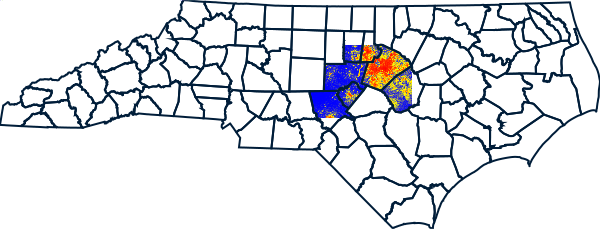

In [21]:
gs.run_command('r.futures.potsurface', input='potential.csv', subregions='sa_counties', output='suitability')
gs.run_command('r.colors', map='suitability', color='byr')
show('suitability')

Demand

In [32]:
# road raster was made with mask so should be limited to the 6 county extent
!r.mask raster=roads@input maskcats=0

All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.


In [4]:
years = ','.join([str(i) for i in range(2022, 2051)])

In [5]:
years

'2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050'

In [ ]:
# reformat population data
# see pop_clean.ipynb

In [ ]:
#TODO check about methods

In [6]:
gs.run_command('r.futures.demand', development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016,urban_2019,urban_2021',
               subregions='sa_counties', observed_population='D:\Zoning_Development\input_data\population_trend.csv',
               projected_population='D:\Zoning_Development\input_data\population_projection.csv',
               simulation_times=years, plot='plot_demand.png', demand='demand.csv',
               separator='comma', method='logarithmic')

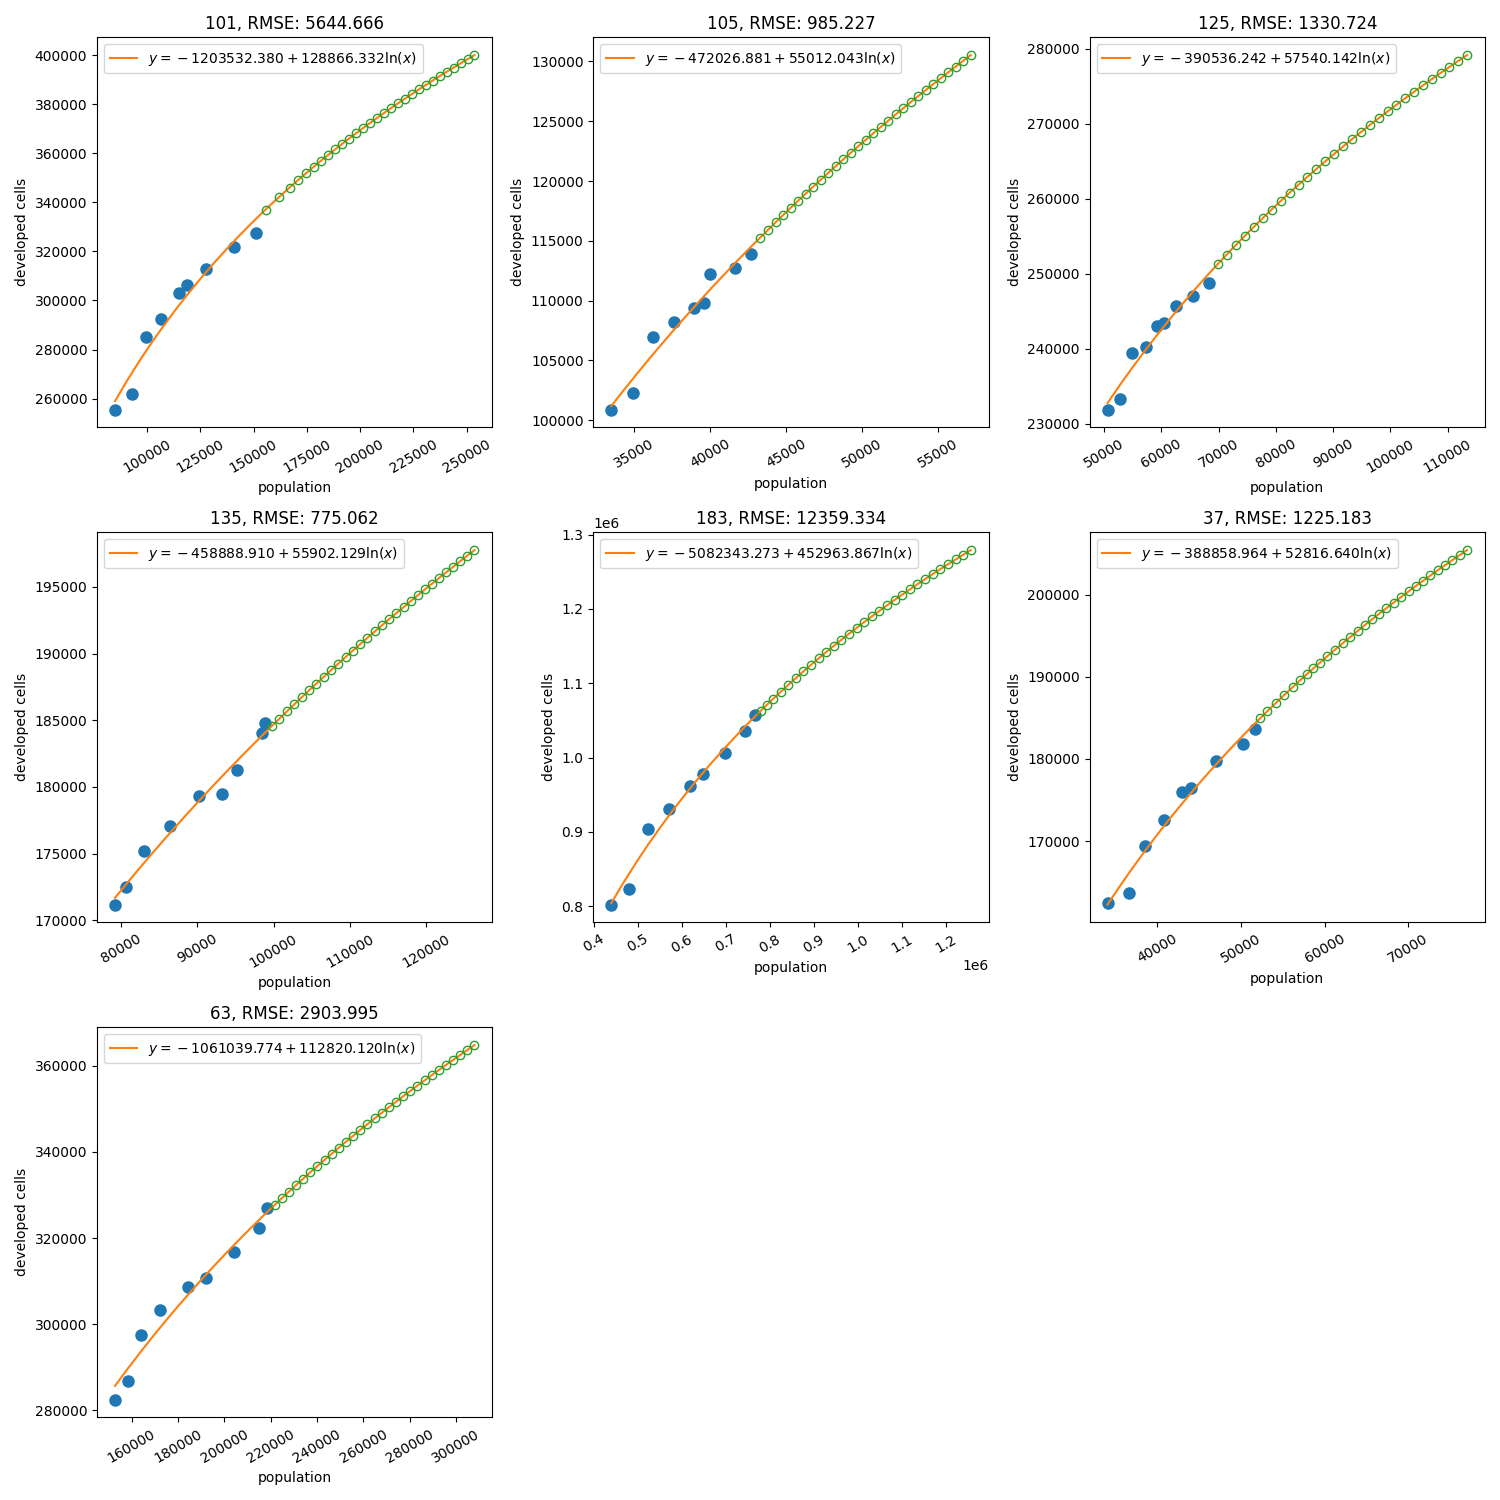

In [7]:
Image('plot_demand.png')

PGA

In [39]:
gs.run_command('r.futures.calib', development_start='urban_2001', development_end='urban_2021',
               subregions='sa_counties', patch_sizes='patches.csv', patch_threshold=1800, flags='ls')

In [41]:
# go back to plain county mask (not roads)
!r.mask vector=central_pines_regional_council@input

Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54

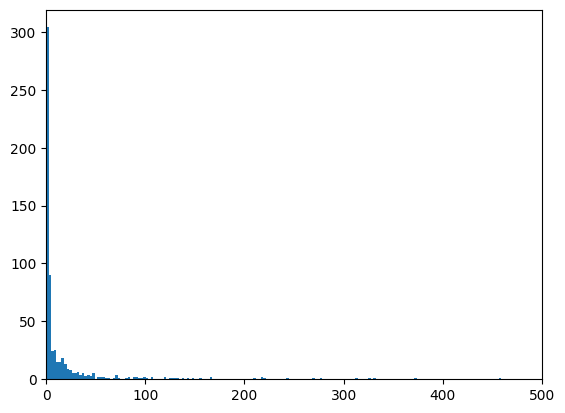

In [42]:
# look at distribution of patches
%matplotlib inline
from matplotlib import pyplot as plt
subregion = 0
with open('patches.csv') as f:
    patches = [patch.split(',')[subregion] for patch in f.readlines()[1:]]
    patches = [int(patch) for patch in patches if patch]
plt.hist(patches, bins='auto', range = (0, 500))
plt.xlim(0,500)
plt.show()

In [ ]:
#TODO get list of predictors from column names in potential.csv
# using R since Pandas & Python isn't working

In [43]:
predictors = 'dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope'

Calibrate patch shape

In [2]:
!r.futures.calib --o -s development_start=urban_2001 development_end=urban_2021 subregions=sa_counties patch_sizes=patches.csv patch_threshold=1800 repeat=5 calibration_results=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\calib.csv nprocs=5 predictors=dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope devpot_params=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\potential.csv development_pressure=devpressure_30_05_01_2021n_dev_neighbourhood=30 development_pressure_approach=gravity gamma=0.5 scaling_factor=0.1 demand=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\demand.csv discount_factor=0.1 compactness_mean=0,0.2,0.4 compactness_range=0.1 num_neighbors=4 seed_search=probability random_seed=1

'r.futures.calib' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# calib wasn't running because dev_pressure wasn't included in potential.csv - but using dredge function didn't keep dev_pressure as one of the predictors....

In [ ]:
gs.run_command('r.futures.calib', development_start='urban_2001', development_end='urban_2021',
               subregions='sa_counties', patch_sizes='patches.csv', patch_threshold=1800, flags='s',
               repeat=5, calibration_results='calib.csv', nprocs=5,
               predictors='dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope',
               devpot_params='potential.csv', development_pressure='devpressure_30_05_01_2021',
               n_dev_neighbourhood=30, development_pressure_approach='gravity', gamma=0.5, scaling_factor=0.1,
               demand='demand.csv', discount_factor=[0.1], compactness_mean=[0, 0.2, 0.4],
               compactness_range=[0.1], num_neighbors=4, seed_search='probability', random_seed=1, overwrite=True)

In [ ]:
!cat calib.csv

In [1]:
# pull out best values
with open('calib.csv') as f:
    disc_factor, comp_mean, comp_range = f.readlines()[1].split(',')[:3]

In [2]:
disc_factor

'0.10'

Single FUTUREs simulation

In [ ]:
# for some reason wants five predictors instead of six?

In [ ]:
gs.run_command('r.futures.simulation', subregions='sa_counties', developed='urban_2021',
               predictors='dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope',
               devpot_params='C:\\Users\\malawrim\\Documents\\GitHub\\FUTURES_zoning_prelim\\potential.csv', development_pressure='devpressure_30_05_01_2021',
               n_dev_neighbourhood=30, development_pressure_approach='gravity', gamma=0.5, scaling_factor=0.1,
               demand='C:\\Users\\malawrim\\Documents\\GitHub\\FUTURES_zoning_prelim\\demand.csv', discount_factor=0.1, compactness_mean=0.1, compactness_range=0.1,
               patch_sizes='C:\\Users\\malawrim\\Documents\\GitHub\\FUTURES_zoning_prelim\\patches.csv', num_neighbors=4, seed_search='probability', random_seed=1,
               output='final', output_series='step')


In [ ]:
gs.run_command('r.futures.pga', subregions='counties', developed='urban_2016',
               predictors='dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope',
               devpot_params='potential.csv', development_pressure='devpressure_30_05_01_2016',
               n_dev_neighbourhood=30, development_pressure_approach='gravity', gamma=0.5, scaling_factor=0.1,
               demand='demand.csv', discount_factor=disc_factor, compactness_mean=comp_mean, compactness_range=comp_range,
               patch_sizes='patches.csv', num_neighbors=4, seed_search='probability', random_seed=1,
               output='final', output_series='step')

In [ ]:
r.futures.simulation subregions=sa_counties developed=urban_2021 predictors=dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_water_km,forest_2001_smooth_perc,slope devpot_params=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\potential.csv development_pressure=devpressure_30_05_01_2021 n_dev_neighbourhood=30 development_pressure_approach=gravity gamma=0.5 scaling_factor=0.1 demand=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\demand.csv discount_factor=0.1 compactness_mean=0.2 compactness_range=0.1 patch_sizes=C:\Users\malawrim\Documents\GitHub\FUTURES_zoning_prelim\patches.csv num_neighbors=4 seed_search=probability random_seed=1 output=final output_series=step

In [ ]:
show_interactively('final')